In [14]:
#practical linear regression

#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#import datasets
df = pd.read_csv('dataset/Salary_Data.csv')

In [5]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df.shape

(30, 2)

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salary')

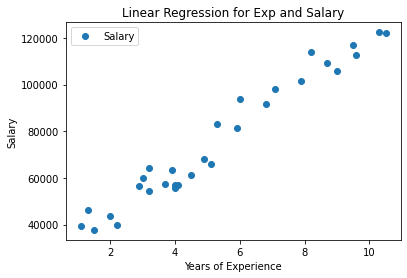

In [12]:
df.plot(x="YearsExperience",y='Salary',style='o')
plt.title("Linear Regression for Exp and Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

<AxesSubplot:xlabel='Salary', ylabel='Density'>

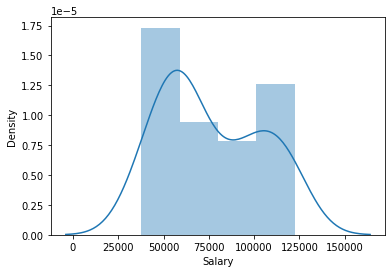

In [16]:
#by using this disttribution plot i can able to observe that the average salary is between 75,000 to 100000
sns.distplot(df['Salary'])

In [70]:
X = df.iloc[:,0].values.reshape(-1,1)

In [71]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [72]:
y = df.iloc[:,1].values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [73]:
X.shape,y.shape

((30, 1), (30, 1))

In [110]:
#we have to allocate data for training and test 
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,train_size=0.2,random_state=657)
#now we select our model ..now we need to train our data

In [111]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [112]:
#to see the intercept value
linreg.intercept_

array([26606.39220291])

In [113]:
#to see the slope value
linreg.coef_

array([[9279.51620479]])

In [114]:
#to see the model prediction score
linreg.score(X_train,y_train)

0.9284899212911863

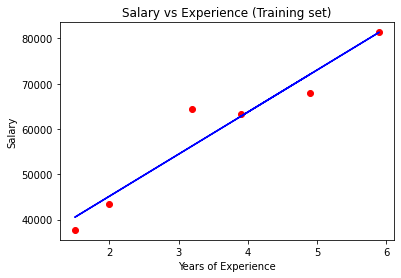

In [115]:
#Visualizing the training set results

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linreg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [121]:
#comparing actual output and predictedoutput
compare_data = pd.DataFrame({'Actual': y_test.flatten(),'Predict' : y_pred.flatten()})
compare_data

,Actual,Predict
0,91738.0,89707.102395
1,57081.0,64652.408643
2,66029.0,73931.924847
3,121872.0,124041.312353
4,39891.0,47021.327853
5,109431.0,107338.183185
6,39343.0,36813.860028
7,54445.0,56300.844058
8,83088.0,75787.828088
9,60150.0,54444.940817


<AxesSubplot:>

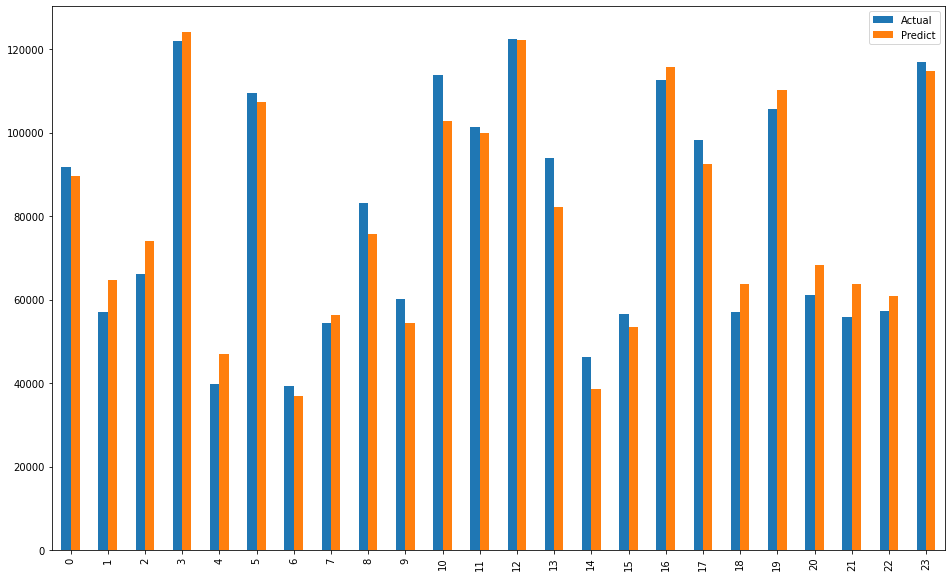

In [124]:
#we can use bar graph to compare results between actual vs predicted
compare_data.plot(kind="bar",figsize=(16,10))

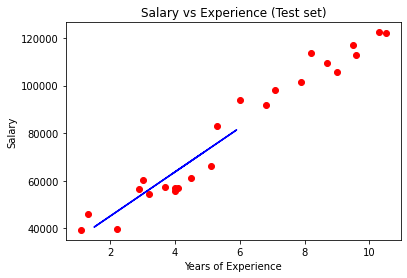

In [127]:
#visualizing test results
plt.scatter(X_test,y_test,color = "Red")
plt.plot(X_train, linreg.predict(X_train),color="blue")
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [133]:
#to see mse,mae,rmse
from sklearn import metrics

print("Mean Absolute Error(MAE)",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE)",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error(MAE) 5108.25086112416
Mean Squared Error (MSE) 35459802.22080616
Root Mean Squared Error (RMSE) 5954.813365740874
